In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm  import SVR 
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12588\4015023870.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv(r'D:\sem4\MachineLearningProjects\notebook\data\stud.csv')

In [4]:
df.head()





,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x = df.drop(columns = 'math_score', axis = 1)

In [6]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df['math_score']

In [8]:
y 

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
num_features = x.select_dtypes(exclude = 'object').columns
cat_features = x.select_dtypes(include = 'object').columns

print(num_features, cat_features)

Index(['reading_score', 'writing_score'], dtype='object') Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [10]:
numeric_transformer = StandardScaler()
categoric_transformer = OneHotEncoder()

preprocessor  = ColumnTransformer(
    [
        ('OneHotEncoder', numeric_transformer,num_features),
        ('StandardScaler', categoric_transformer, cat_features)
    ]
)

In [11]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object')),
                                ('StandardScaler', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object'))])

In [12]:
X = preprocessor.fit_transform(x)

In [13]:
X.shape

(1000, 19)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 19) (300, 19) (700,) (300,)


In [15]:
def evaluate_model(true, pred):
    r2score = r2_score(true, pred)
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    rmse = root_mean_squared_error(true, pred)
    return mse, mae, rmse, r2score

In [16]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'SVR'  : SVR(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'CatBoosting Regressor' : CatBoostRegressor(verbose=False),
    'AdaBoost Regressor' : AdaBoostRegressor()
    }

In [17]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    mse_train, mae_train, rmse_train, r2_score_train = evaluate_model(y_train, y_pred_train)
    mse_test, mae_test, rmse_test, r2_score_test = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print('- Root Mean Square Error: {:.4f}'.format(rmse_train))
    print('- Mean Square Error: {:.4f}'.format(mse_train))
    print('- Mean Absolute Error: {:.4f}'.format(mae_train))
    print('- R2 Score: {:.4f}'.format(r2_score_train))
    


    print('----------------------------------------------------')

    print('Model performance for Test set')
    print('- Root Mean Square Error: {:.4f}'.format(rmse_test))
    print('- Mean Square Error: {:.4f}'.format(mse_test))
    print('- Mean Absolute Error: {:.4f}'.format(mae_test))
    print('- R2 Score: {:.4f}'.format(r2_score_test))

    r2_list.append(r2_score_test)

    print('='*40)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Square Error: 5.2483
- Mean Square Error: 27.5447
- Mean Absolute Error: 4.1985
- R2 Score: 0.8751
----------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 5.5576
- Mean Square Error: 30.8866
- Mean Absolute Error: 4.4183
- R2 Score: 0.8759


Lasso
Model performance for Training set
- Root Mean Square Error: 6.5106
- Mean Square Error: 42.3874
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 6.8705
- Mean Square Error: 47.2040
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Square Error: 5.2487
- Mean Square Error: 27.5484
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 5.5566
- Mean Square Error: 

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)


,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.875863
8,CatBoosting Regressor,0.852108
6,Random Forest Regressor,0.848711
9,AdaBoost Regressor,0.837659
7,XGBRegressor,0.811029
1,Lasso,0.810282
4,K-Neighbors Regressor,0.771569
5,Decision Tree,0.728401
3,SVR,0.726848


In [21]:
lin_model = Ridge(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)

print('Accuracy Score', score*100)

Accuracy Score 87.59067784434541


Text(0, 0.5, 'Predicted')

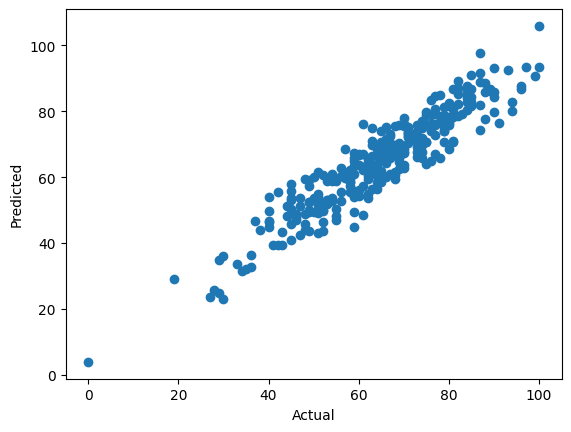

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

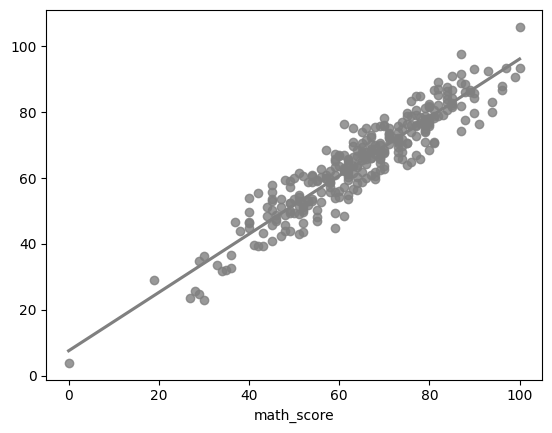

In [25]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='grey')

In [27]:
pred_diff = pd.DataFrame({'Actual Value':y_test, 'Predicted Value': y_pred, 'Difference':y_test - y_pred})

pred_diff

,Actual Value,Predicted Value,Difference
521,91,76.522653,14.477347
737,53,58.853377,-5.853377
740,80,76.935975,3.064025
660,74,76.919776,-2.919776
411,84,87.620347,-3.620347
...,...,...,...
468,77,72.886106,4.113894
935,70,62.627388,7.372612
428,65,58.636648,6.363352
7,40,44.853500,-4.853500
